<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

Import pandas and matplotlib modules


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [3]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [4]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [5]:
## Write your code here
# Makes a dataframe for repeated rows
df_duplicate_rows = df[df.duplicated()]

# Returns total count of duplicated rows and prints total
duplicate_count = len(df_duplicate_rows)
print('Number of duplicated rows from dataset:', duplicate_count)

# Prints df of duplicated rows
print(df_duplicate_rows.head(5))


Number of duplicated rows from dataset: 20
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to open-source proj

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [6]:
## Write your code here
# QUESTION 1
# Finding the duplicates in the dataset based on specific columns
df_duplicated_filter = df[df.duplicated(
    subset=['MainBranch', 'Employment', 'RemoteWork']
    )]

# Setting up list for column values to search through
cols_list = ['MainBranch', 'Employment', 'RemoteWork']

# Loop through list values to find most repeated answers in dataset
for column in cols_list:
    print(df_duplicated_filter[column].value_counts())
    print()

print("------")
# QUESTION 2
cols_list_2 = ['Age', 'CodingActivities', 'EdLevel']
for column in cols_list_2:
    print(df_duplicated_filter[column].value_counts())
    print()

MainBranch
I am a developer by profession                                                           50042
I am not primarily a developer, but I write code sometimes as part of my work/studies     6392
I am learning to code                                                                     3774
I code primarily as a hobby                                                               3252
I used to be a developer by profession, but no longer am                                  1436
Name: count, dtype: int64

Employment
Employed, full-time                                                                                                                                                       39031
Independent contractor, freelancer, or self-employed                                                                                                                       4829
Student, full-time                                                                                                          

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


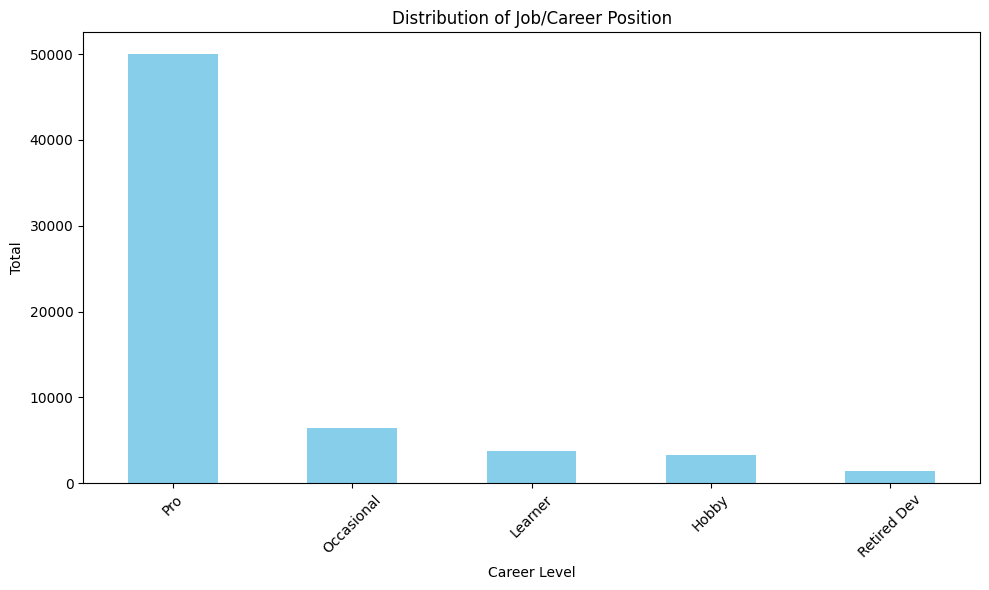

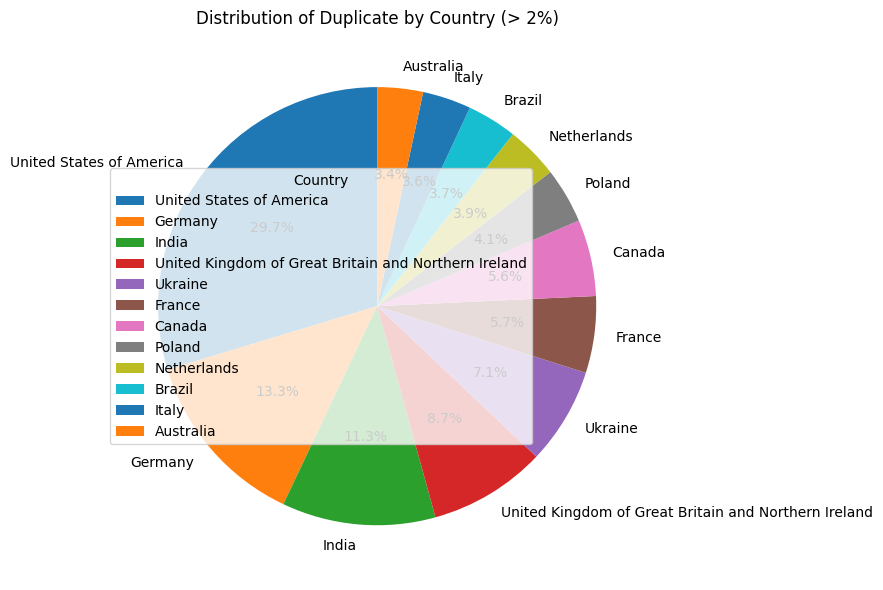

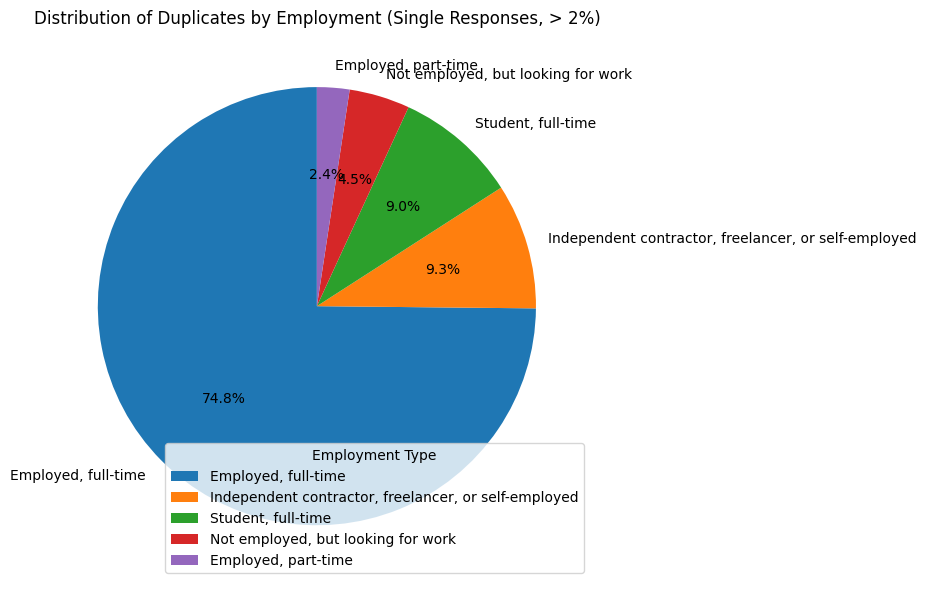

In [7]:
## Write your code here
# Plotting MainBranch data on bar chart
# Mapping naming of MainBranch values
label_map = {
    'I am a developer by profession': 'Pro',
    'I am not primarily a developer, but I write code sometimes as part of my work/studies': 'Occasional',
    'I am learning to code': 'Learner',
    'I code primarily as a hobby': 'Hobby',
    'I used to be a developer by profession, but no longer am': 'Retired Dev'
}

# Changes names of MainBranch based on labeling
df_mainbranch_plot = df_duplicated_filter['MainBranch'].map(label_map).value_counts()

# Plots the graph as bar with fixed size
df_mainbranch_plot.plot(kind='bar',
                        figsize=(10, 6),
                        color='skyblue')

# Applies labels to areas within the graphic
plt.title('Distribution of Job/Career Position')
plt.xlabel('Career Level')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Get value counts and calculate percentage
country_counts = df_duplicated_filter['Country'].value_counts(normalize=True)

# Filter to keep only countries with >= 2% responses
filtered_country = country_counts[country_counts >= 0.02]

# Plotting Country as pie charts
filtered_country.plot(kind='pie',
                      autopct='%1.1f%%',
                      startangle=90,
                      figsize=(10, 6))

# Applies labels and title to graphic
plt.title('Distribution of Duplicate by Country (> 2%)')
plt.legend(title='Country', loc='best')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Removes mixed results for better graphic; only single answers will plot
employment_clean = df_duplicated_filter[
    ~df_duplicated_filter['Employment'].str.contains(';', na=False)
]

# Get value counts and filter down
employment_counts = employment_clean['Employment'].value_counts(normalize=True)
filtered_employment = employment_counts[employment_counts >= 0.02]

# Plotting Employment as pie charts
filtered_employment.plot(kind='pie',
                         autopct='%1.1f%%',
                         startangle=90,
                         figsize=(10, 6))

# Applies labels and title to graphic
plt.title('Distribution of Duplicates by Employment (Single Responses, > 2%)')
plt.legend(title='Employment Type', loc='best')
plt.ylabel('')
plt.tight_layout()
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [8]:
## Write your code here
# Getting list of all available columns in dataset
# print(df.columns.tolist())

# List of columns for uniqueness
subset_columns = [
    'MainBranch',
    'Age',
    'Employment',
    'RemoteWork',
    'Country',
    'EdLevel',
    'YearsCode',
    'YearsCodePro',
    'DevType',
    'OrgSize',
    'WorkExp',
    'Industry'
]

# Removing duplicates
df_cleaned = df.drop_duplicates(subset=subset_columns)
print('Before:', len(df))
print('After:', len(df_cleaned))
print('Difference:', len(df) - len(df_cleaned))

Before: 65457
After: 59897
Difference: 5560


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
